<h1 style="text-align: center;"><span style="font-family:Courier; color: blue">vivarium</span> Deep Dive</h1>

<p style="text-align: center;">James Collins</p>
<p style="text-align: center;">June 14, 2019</p>

# Agenda

Let's lay out the agenda

**Slide**

We'll start with a quick overview of what the vivarium framework is

Won't go into any detail. In the next few months I'll give some longer talks on the framework architecture and the underlying methodology. Today, we want to get to a quick demo of some of the things we've been doing.

**Slide**

We sit on top of an incredibly rich data source for public health modeling and we've done a ton of work to integrate it into our simulations. I'll give a brief overview of some of the public health modeling tools we've built using vivarium.

**Slide**

Finally, we'll build up an individual-based disease model.  We'll start with a simple birth-death model.  Then throw in a disease and a risk and see how that changes things.  Then I'll show you some example outputs from full scale models.

1. What is <span style="font-family:Courier; color: blue">vivarium</span>?

2. How do you use <span style="font-family:Courier; color: blue">vivarium</span> to model public health dynamics?

3. A "relatively" simple disease model example.

<h1>What is <span style="font-family:Courier; color: blue">vivarium</span>?</h1>

<h2><span style="font-family:Courier; color: blue">vivarium</span> is a discrete-time Monte Carlo simulation framework<h2>

First, what is vivarium?

**Slide**

That's a lot of things.  Let's look at it in pieces.

<h2><span style="font-family:Courier; color: blue">vivarium</span> is a <span style="color: red">discrete-time</span> Monte Carlo simulation framework<h2>

First it's a discrete time framework.  This means time in the simulation proceeds in discrete chunks (e.g. a second, a day, a month).  

**Slide**

This is the only equation, I promise.

Think of X as a snapshot of the world and our model as some (possibly time-dependent) function.  To progress to the next snapshot we take a step forward in time by evaluating our function on the current state of the world.

**Slide**

This is the fundamental nature of many kinds of simulation models. What's important is that we decide what delta t is before we evaluate our model and move to the next step. We'll ask questions like does a person get sick in the next month?  Do they die in the next month?  etc.

$$
X_{t+\Delta t} = f(X_t, t, \Delta t)
$$

<img src="model_loop.png" style="display: block; margin-left: auto; margin-right: auto; width: 40%">

<h2><span style="font-family:Courier; color: blue">vivarium</span> is a discrete-time <span style="color: red">Monte Carlo simulation</span> framework<h2>

How many of you are familiar with Monte Carlo methods?  Someone want to take a stab at defining them?

Using random numbers to inform stuff we don't know for sure about.

**Slide**

I had a professor in a science class tell me that any measurement without an estimation of uncertainty is totally useless.  We spend a ton of time trying to inform policy makers to help them make good decisions about what to do.  That gives us a tremendous amout of power, so accurately representing how certain or uncertain we are is an important responsibility.

**Slide**

In the context of our simulations, we use Monte Carlo methods to capture all the exogenous randomness in the model.  E.g. I may know your age/sex/bmi/smoking history, but I don't necessarily know how frequently you eat hamburgers or whether you go to political protests or whether there's mold in your workplace or eight million other things.  We capture all that exogenous heterogeneity with random numbers.


Note: We also deal with parameter uncertainty, and I'll talk about that a bit at the end if there's time.

- We care about uncertainty

- We care about <span style="color: green">stochastic</span> uncertainty.

<h2><span style="font-family:Courier; color: blue">vivarium</span> is a discrete-time Monte Carlo simulation <span style="color: red">framework</span><h2>

Frameworks are funny things in software.

**Slide**

Web and Gui frameworks allow users to build applications for end users.

**Slide**

It provides a bunch of features that are generally useful in simulation modeling like state management, data interpolation, a clock, etc, as well as an environment in which to run those simulations.  

If that seems abstract, it's because it is.  Let's get concrete.

- Frameworks are tools for building tools

- <span style="font-family:Courier; color: blue">vivarium</span> is a tool for building tools for building simulation models.

<h1>How do you use <span style="font-family:Courier; color: blue">vivarium</span> to model public health dynamics?</h1>

Well according to what we just learned, we use vivarium to build public health modeling tools.

<h2>Use <span style="font-family:Courier; color: blue">vivarium_public_health</span>!</h2>

vph is a suite of public health specific modeling components built to think about public health phenomena in the same way that GBD does. It includes:

- Components that capture demographic aspects of a modeled population (the starting population characteristics, birth, death, disability).

- Components that capture how diseases affect the population and how those diseases affect mortality and disability.

- Components that model risk exposure and how that risk exposure contributes to disease incidence and mortality.

- Components that measure and report what's going on in the simulated population.

<h1 style="text-align: center;">Let's build a model!</h1>

In [1]:
!cat birth_death.yaml

plugins:
        optional:
                data:
                        controller: "vivarium_public_health.dataset_manager.ArtifactManager"
                        builder_interface: "vivarium_public_health.dataset_manager.ArtifactManagerInterface"

components:
        vivarium_public_health:
                population:
                        - BasePopulation()
                        - Mortality()
                        - FertilityCrudeBirthRate()
                metrics:
                        - Disability()
                        - MortalityObserver()

configuration:
        input_data:
                location: Kenya
                input_draw_number: 0
                artifact_path: /home/collijk/vivarium-demo/artifact.hdf
        time:
                start:
                        year: 2010
                end:
                        year: 2015
                step_size: 28 # Days
        population:
                age_start: 0
                age_end: 100
             

Here's an example model specification.  

Key pieces: 

components
- population
- mortality
- fertility

configuration
- input data
- time span and step size
- population characteristics

Data that informs this model:

- GBD population estimates
- GBD live births by sex -> Crude birth rate
- GBD all cause mortality rate


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
from pathlib import Path
from vivarium.interface import initialize_simulation_from_model_specification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style='darkgrid')

sim = initialize_simulation_from_model_specification('birth_death.yaml')
sim.configuration.input_data.artifact_path = str(Path('.').resolve() / 'artifact.hdf')
sim.setup()


KeyError: ('age_group_start', 'occurred at index 0')

Let's do a little exploration.

In [5]:
debug

> /home/collijk/vivarium-demo/2019_05_09_demo/pandas/_libs/hashtable_class_helper.pxi(1608)pandas._libs.hashtable.PyObjectHashTable.get_item()

ipdb> u
> /home/collijk/vivarium-demo/2019_05_09_demo/pandas/_libs/hashtable_class_helper.pxi(1601)pandas._libs.hashtable.PyObjectHashTable.get_item()

ipdb> u
> /home/collijk/vivarium-demo/2019_05_09_demo/pandas/_libs/index.pyx(132)pandas._libs.index.IndexEngine.get_loc()

ipdb> u
> /home/collijk/vivarium-demo/2019_05_09_demo/pandas/_libs/index.pyx(89)pandas._libs.index.IndexEngine.get_value()

ipdb> u
> /home/collijk/vivarium-demo/2019_05_09_demo/pandas/_libs/index.pyx(81)pandas._libs.index.IndexEngine.get_value()

ipdb> u
> /home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/pandas/core/indexes/base.py(4375)get_value()
   4373         try:
   4374             return self._engine.get_value(s, k,
-> 4375                                           tz=getattr(series.dtype, 'tz', None))
   4376         except KeyError as e1:
  

ipdb> u
> /home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/pandas/core/apply.py(257)apply_standard()
    255 
    256         # compute the result using the series generator
--> 257         self.apply_series_generator()
    258 
    259         # wrap results

ipdb> u
> /home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/pandas/core/apply.py(151)get_result()
    149             return self.apply_raw()
    150 
--> 151         return self.apply_standard()
    152 
    153     def apply_empty_result(self):

ipdb> u
> /home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/pandas/core/frame.py(6487)apply()
   6485                          args=args,
   6486                          kwds=kwds)
-> 6487         return op.get_result()
   6488 
   6489     def applymap(self, func):

ipdb> u
> /home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py(370)load_popula

## Examining the population

In [1]:
pop = sim.get_population()
pop.head()

NameError: name 'sim' is not defined

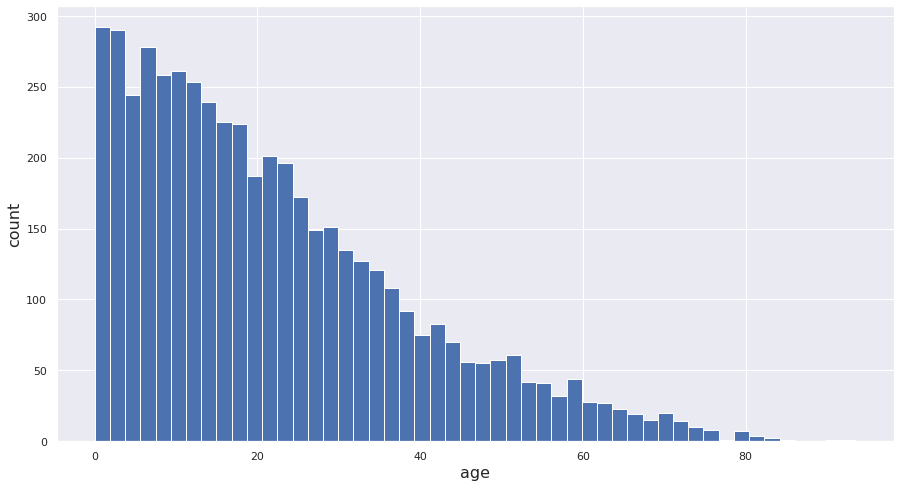

In [5]:
def plot_population(population):
    plt.figure(figsize=(15, 8))
    #sns.distplot(population.age, kde=False, bins=50)

    population.age.hist(bins=50)
    plt.xlabel('age', fontsize=16)
    plt.ylabel('count', fontsize=16)
    plt.show()
    
plot_population(pop)

In [6]:
pop.sex.value_counts()

Female    2513
Male      2487
Name: sex, dtype: int64

In [7]:
pop.alive.value_counts()

alive    5000
Name: alive, dtype: int64

# Running the simulation

In [8]:
sim.run()

66

In [5]:
from vivarium_public_health.dataset_manager import Artifact
a = Artifact('artifact.hdf')

In [7]:
print(a)
df = a.load('cause.all_causes.cause_specific_mortality')

Artifact containing the following keys:
metadata
	keyspace
	versions
	locations
population
	demographic_dimensions
	structure
	theoretical_minimum_risk_life_expectancy
	age_bins
cause
	all_causes
		cause_specific_mortality
	ischemic_heart_disease
		restrictions
		cause_specific_mortality
		prevalence
		disability_weight
		excess_mortality
		incidence
covariate
	live_births_by_sex
		estimate
risk_factor
	high_body_mass_index_in_adults
		exposure
		distribution
		exposure_standard_deviation
		exposure_distribution_weights
		relative_risk
		population_attributable_fraction
		tmred
		relative_risk_scalar



In [11]:
df = a.load('population.structure')
df[df.year_start == 2010]

,location,sex,age_group_start,age_group_end,year_start,year_end,value
20,Kenya,Female,0.000000,0.019178,2010,2011,1.214357e+04
48,Kenya,Female,0.019178,0.076712,2010,2011,3.605687e+04
76,Kenya,Female,0.076712,1.000000,2010,2011,5.705751e+05
104,Kenya,Female,1.000000,5.000000,2010,2011,2.451173e+06
132,Kenya,Female,5.000000,10.000000,2010,2011,2.916606e+06
160,Kenya,Female,10.000000,15.000000,2010,2011,2.607119e+06
188,Kenya,Female,15.000000,20.000000,2010,2011,2.278802e+06
216,Kenya,Female,20.000000,25.000000,2010,2011,2.062814e+06
244,Kenya,Female,25.000000,30.000000,2010,2011,1.783025e+06
272,Kenya,Female,30.000000,35.000000,2010,2011,1.387745e+06


# Examining the final population

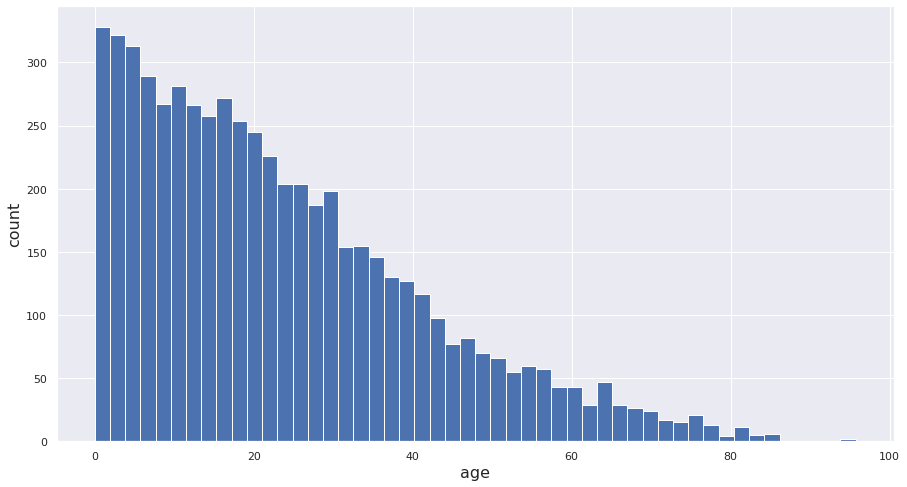

In [13]:
pop_final = sim.get_population()
plot_population(pop_final)

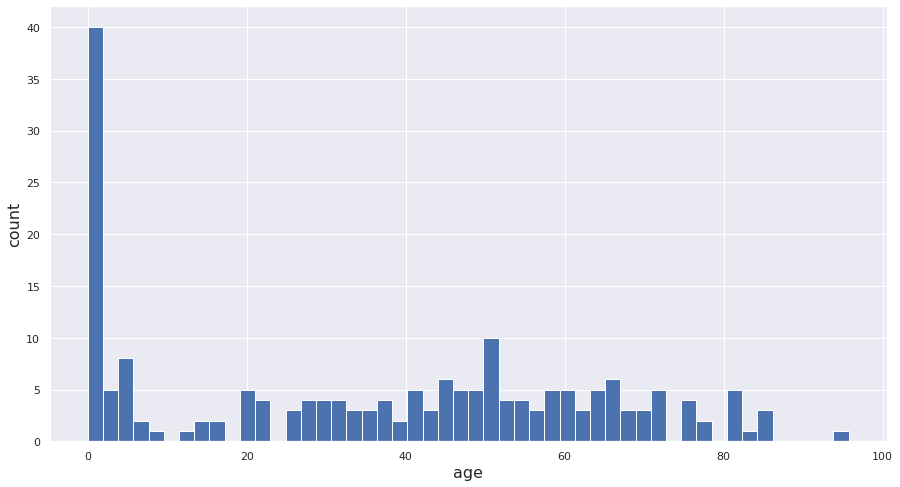

In [14]:
plot_population(pop_final[pop_final.alive == 'dead'])

For experts in the room, anything surprising about this death pattern?

# Let's add a risk and a disease

In [15]:
!cat disease_model.yaml

plugins:
        optional:
                data:
                        controller: "vivarium_public_health.dataset_manager.ArtifactManager"
                        builder_interface: "vivarium_public_health.dataset_manager.ArtifactManagerInterface"

components:
        vivarium_public_health:
                population:
                        - BasePopulation()
                        - Mortality()
                disease.models:
                        - SI('ischemic_heart_disease')
                risks:
                        - Risk("risk_factor.high_body_mass_index_in_adults")
                        - RiskEffect("risk_factor.high_body_mass_index_in_adults", "cause.ischemic_heart_disease.incidence_rate")

configuration:
        input_data:
                location: Kenya
                input_draw_number: 0
                artifact_path: /home/collijk/vivarium-demo/artifact.hdf
        time:
                start:
                        year: 2010
                end:
        

Closed cohort, moved up age since this is an adult disease

In [12]:
sim = setup_simulation_from_model_specification("disease_model.yaml")


/home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/vivarium/framework/configuration.py:35: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml.load(file_path)
/home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/vivarium/config_tree.py:394: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data_dict = yaml.load(data_string)
/home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/risk_distributions/risk_distributions.py:416: RuntimeWarning: overflow encountered in double_scalars
  return (m - mean_guess) ** 2 + (s ** 2 - var_guess) ** 2
/home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:156: FutureWarning: Sorting because non-c

In [17]:
pop = sim.get_population()
pop.head()

,tracked,entrance_time,exit_time,age,sex,alive,location,cause_of_death,years_of_life_lost,ischemic_heart_disease,susceptible_to_ischemic_heart_disease_event_time,susceptible_to_ischemic_heart_disease_event_count,ischemic_heart_disease_event_time,ischemic_heart_disease_event_count
0,True,2010-06-04,NaT,50.476270,Female,alive,Kenya,not_dead,0.0,susceptible_to_ischemic_heart_disease,NaT,0,NaT,0
1,True,2010-06-04,NaT,50.248124,Male,alive,Kenya,not_dead,0.0,susceptible_to_ischemic_heart_disease,NaT,0,NaT,0
2,True,2010-06-04,NaT,52.013228,Male,alive,Kenya,not_dead,0.0,susceptible_to_ischemic_heart_disease,NaT,0,NaT,0
3,True,2010-06-04,NaT,51.187254,Male,alive,Kenya,not_dead,0.0,ischemic_heart_disease,NaT,0,2010-06-04,0
4,True,2010-06-04,NaT,53.988313,Male,alive,Kenya,not_dead,0.0,susceptible_to_ischemic_heart_disease,NaT,0,NaT,0


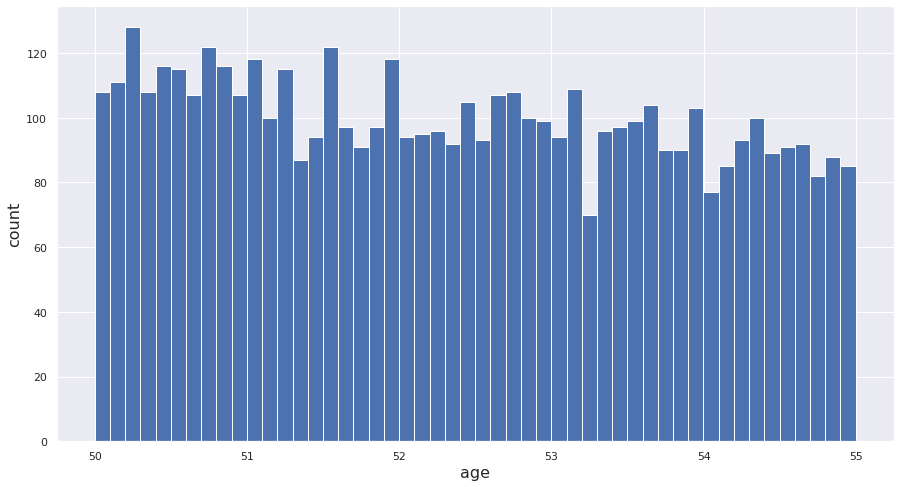

In [18]:
plot_population(pop)

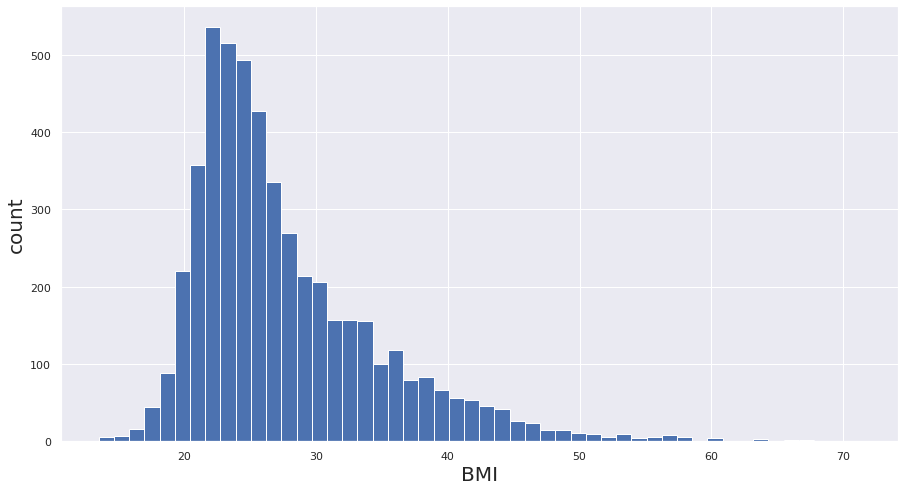

In [15]:
pop = pop.loc[pop.alive == 'alive']
bmi_pipeline = sim.get_value('high_body_mass_index_in_adults.exposure')
bmi = bmi_pipeline(pop.index)

def hist_bmi(bmi_exposure):    
    plt.figure(figsize=(15, 8))

    bmi_exposure.hist(bins=50)
    plt.xlabel('BMI', fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.show()

hist_bmi(bmi)



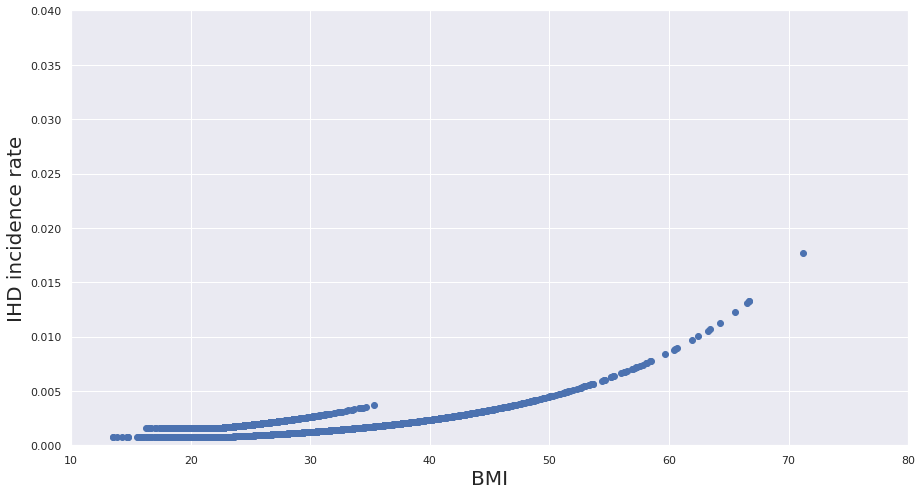

In [19]:
ihd_pipeline = sim.get_value('ischemic_heart_disease.incidence_rate')
ihd = ihd_pipeline(pop.index)

def plot_ihd_vs_bmi(bmi_exposure, ihd_incidence):    
    plt.figure(figsize=(15, 8))
    plt.scatter(bmi_exposure, ihd_incidence * 365/28)
    plt.xlabel('BMI', fontsize=20)
    plt.ylabel('IHD incidence rate', fontsize=20)
    plt.xlim(10, 80)
    plt.ylim(0, 0.04)

    plt.show()
    
plot_ihd_vs_bmi(bmi, ihd)

In [24]:
ihd_pipeline.source

<bound method RateTransition.rates of Transition(from=susceptible_to_ischemic_heart_disease, to=ischemic_heart_disease)>

In [26]:
sim.run()

66

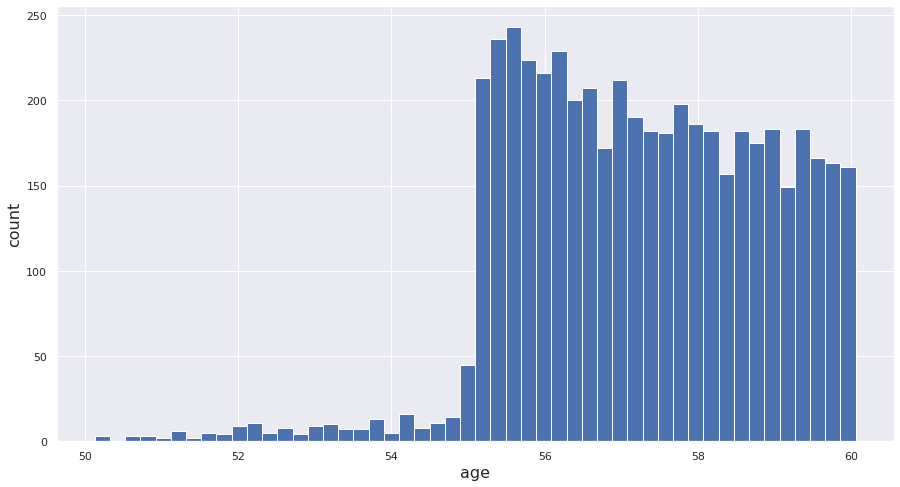

In [27]:
final_pop = sim.get_population()
plot_population(final_pop)

In [28]:
final_pop = final_pop.loc[final_pop.alive == 'alive']
final_bmi = bmi_pipeline(final_pop.index)
final_ihd = ihd_pipeline(final_pop.index)

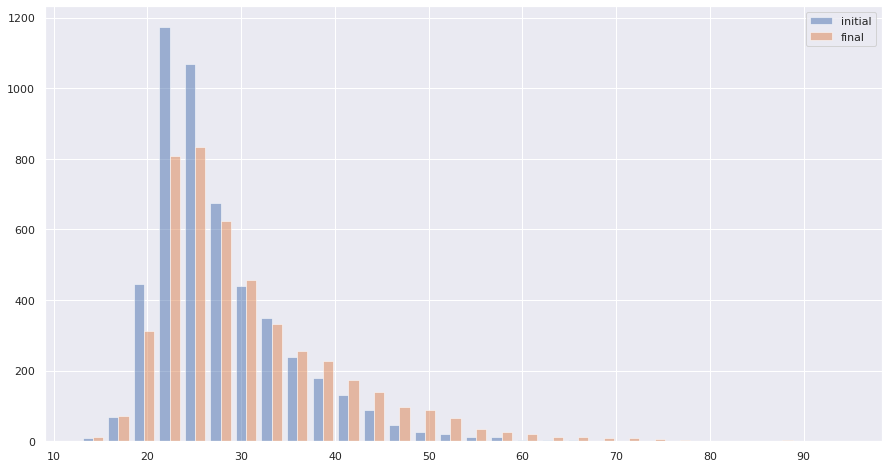

In [29]:
def compare_bmi(bmi_exposure, final_bmi_exposure):
    plt.figure(figsize=(15, 8))
    a = plt.hist([bmi, final_bmi], bins=30, alpha=0.5)
    #b = plt.hist(final_bmi, bins=50, alpha=0.5)    
    plt.legend(a, labels=('initial', 'final'))
    plt.show()
    
compare_bmi(bmi, final_bmi)

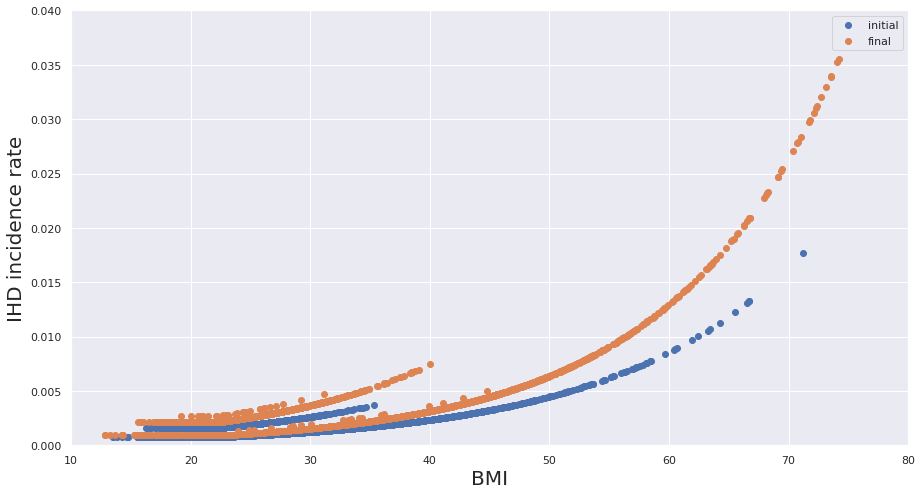

In [30]:
def compare_ihd_vs_bmi(bmi_exposure, bmi_final_exposure, ihd_incidence, ihd_final_incidence):    
    plt.figure(figsize=(15, 8))
    plt.scatter(bmi_exposure, ihd_incidence * 365/28, label='initial')
    plt.scatter(bmi_final_exposure, ihd_final_incidence * 365/28, label='final')
    plt.legend()
    plt.xlabel('BMI', fontsize=20)
    plt.ylabel('IHD incidence rate', fontsize=20)
    
    plt.xlim(10, 80)
    plt.ylim(0, 0.04)

    plt.show()

compare_ihd_vs_bmi(bmi, final_bmi, ihd, final_ihd)

# What do results actually look like?

<img src="ischemic_stroke.png">

<img src="individual.png">

<img src="maternal_intervention.png">

<h1 style="text-align: center;">Thanks!</h1>

<h2>Vivarium Engineering Team</h2>

Kate Wilson

Cody Horst

<h2>Simulation Science Research Team</h2>

Abie Flaxman

Christine Allen

Derrick Tsoi

Kelly Compton

Yongquan Xie

Yaqi Wang

Nathaniel Blair-Stahn

Yash Parikh

Aditya Kannan



In [26]:
print(a)
a.load('cause.all_causes.cause_specific_mortality')

Artifact containing the following keys:
metadata
	keyspace
	versions
	locations
population
	demographic_dimensions
	structure
	theoretical_minimum_risk_life_expectancy
	age_bins
cause
	all_causes
		cause_specific_mortality
	ischemic_heart_disease
		restrictions
		cause_specific_mortality
		prevalence
		disability_weight
		excess_mortality
		incidence
covariate
	live_births_by_sex
		estimate
risk_factor
	high_body_mass_index_in_adults
		exposure
		distribution
		exposure_standard_deviation
		exposure_distribution_weights
		relative_risk
		population_attributable_fraction
		tmred
		relative_risk_scalar



,draw,location,sex,age_group_start,age_group_end,year_start,year_end,value
0,0,Kenya,Female,0.000000,0.019178,1990,1991,0.841145
1,0,Kenya,Female,0.000000,0.019178,1991,1992,0.843753
2,0,Kenya,Female,0.000000,0.019178,1992,1993,0.842126
3,0,Kenya,Female,0.000000,0.019178,1993,1994,0.846064
4,0,Kenya,Female,0.000000,0.019178,1994,1995,0.871440
5,0,Kenya,Female,0.000000,0.019178,1995,1996,0.883534
6,0,Kenya,Female,0.000000,0.019178,1996,1997,0.889527
7,0,Kenya,Female,0.000000,0.019178,1997,1998,0.897741
8,0,Kenya,Female,0.000000,0.019178,1998,1999,0.911964
9,0,Kenya,Female,0.000000,0.019178,1999,2000,0.918270


In [ ]:
a.write(key, data)